In [6]:
# ---------------------------------------------
# A. Load Dataset
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./data/maternal_health_risk.csv")

df.head()

# Dataset shape (rows, columns)
df.shape

# Data types and missing values
df.info()

# Quick look at basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


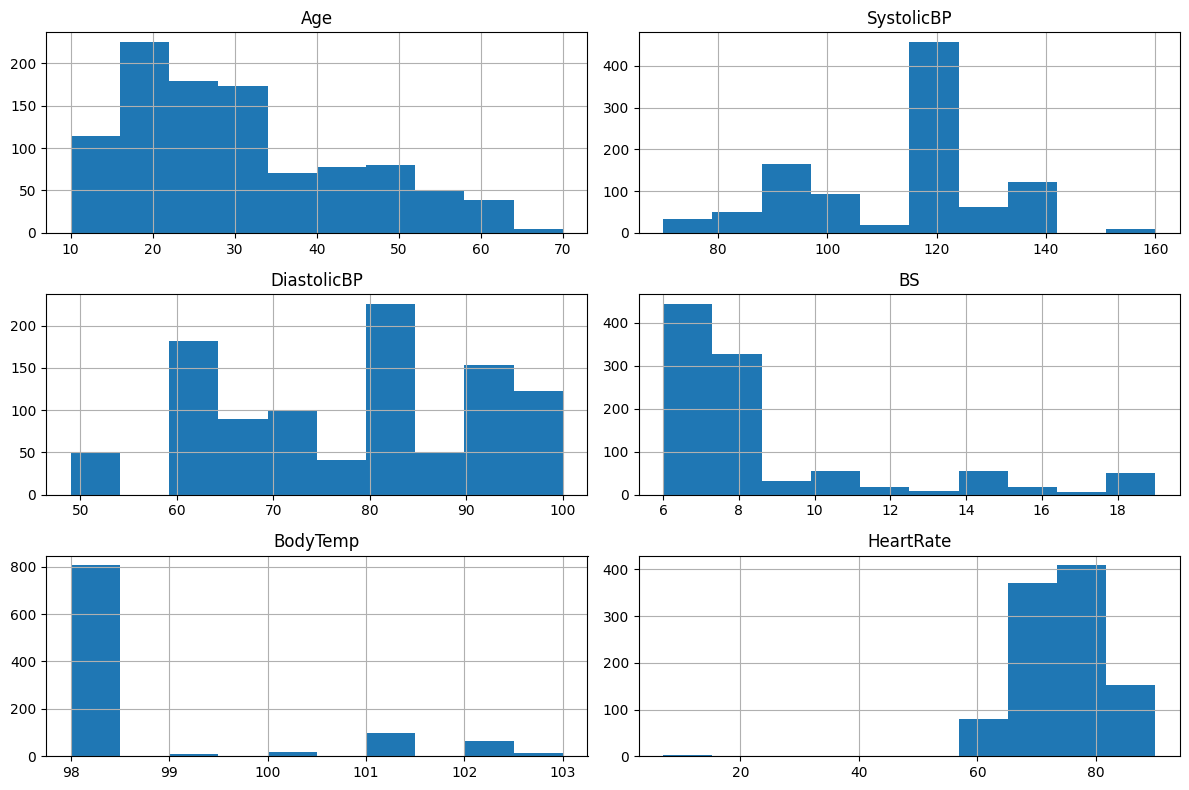

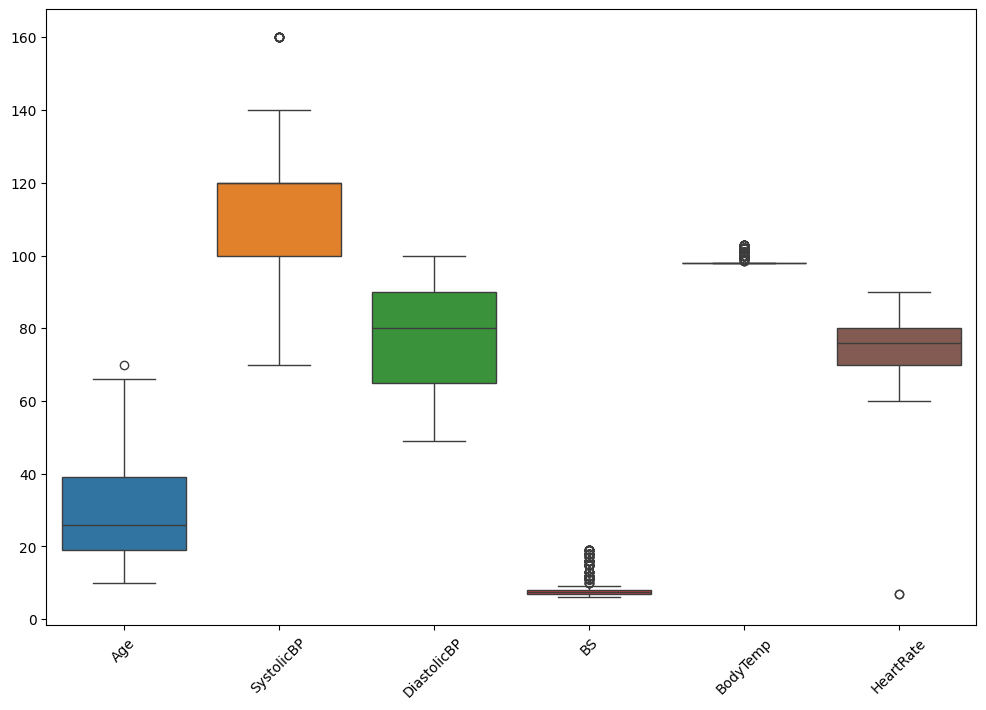

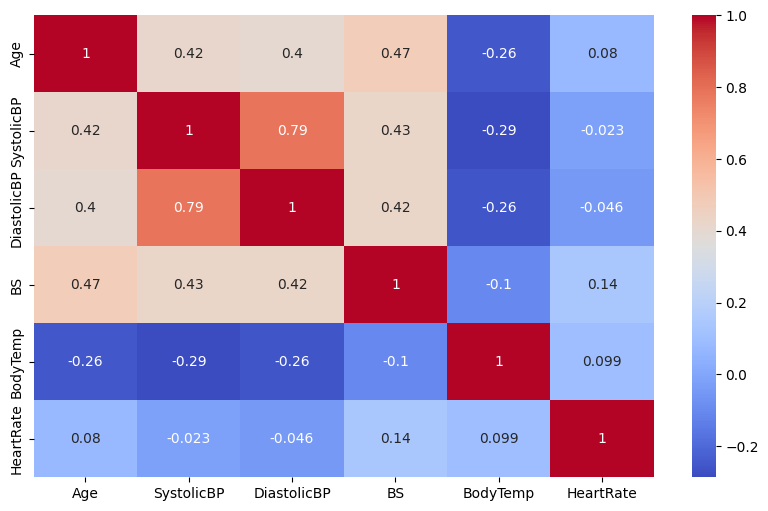

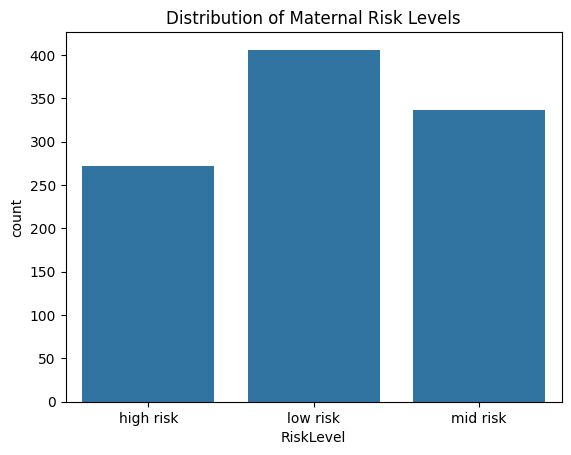

In [7]:
## B. Exploratory Data Analysis (EDA)

# Summary statistics 
df.describe()

# Missing values
df.isna().sum()

df.dtypes

# Histograms
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Outliers and spread
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop(columns=['RiskLevel']))
plt.xticks(rotation=45)
plt.show()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Distribution
df['RiskLevel'].value_counts()
sns.countplot(data=df, x='RiskLevel')
plt.title("Distribution of Maternal Risk Levels")
plt.show()


In [8]:
## C. Data Preparation

# Check duplicates
df.duplicated().sum()

# Remove duplicates if any exist
df = df.drop_duplicates()

df.isna().sum()

# Converting to numeric values
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

# Features
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Split into training, test, and validation 
# sets

# train vs temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# validation vs test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Part D: Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# -------------------------------
# 1. Logistic Regression
# -------------------------------
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

# -------------------------------
# 2. K-Nearest Neighbors
# -------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# -------------------------------
# 3. Random Forest Classifier
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    max_depth=None
)
rf.fit(X_train, y_train) 

print("Logistic Regression training accuracy:", log_reg.score(X_train_scaled, y_train))
print("KNN training accuracy:", knn.score(X_train_scaled, y_train))
print("Random Forest training accuracy:", rf.score(X_train, y_train))

Logistic Regression training accuracy: 0.6645569620253164
KNN training accuracy: 0.7563291139240507
Random Forest training accuracy: 0.939873417721519


/Users/ibrokhimov/development/maternal_health_streamlit/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



---- Logistic Regression ----
Accuracy: 0.662

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.62      0.97      0.76        35
           2       0.50      0.06      0.11        16

    accuracy                           0.66        68
   macro avg       0.68      0.54      0.53        68
weighted avg       0.66      0.66      0.59        68



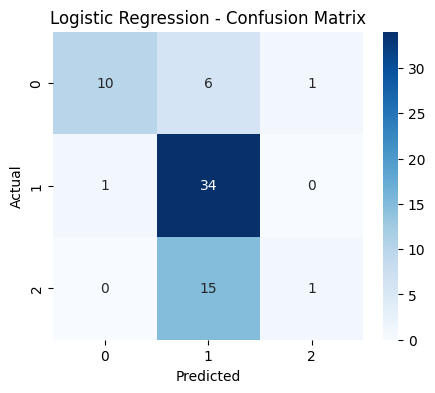


---- KNN ----
Accuracy: 0.603

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.62      0.83      0.71        35
           2       0.29      0.12      0.17        16

    accuracy                           0.60        68
   macro avg       0.54      0.51      0.51        68
weighted avg       0.56      0.60      0.57        68



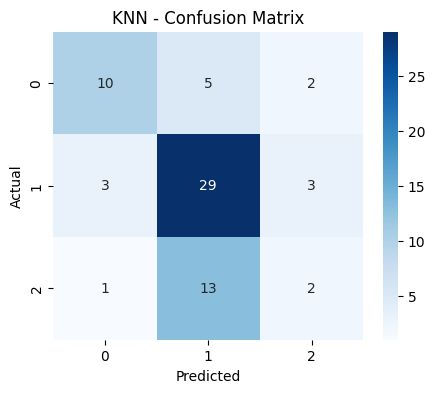


---- Random Forest ----
Accuracy: 0.574

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.62      0.69      0.65        35
           2       0.15      0.12      0.14        16

    accuracy                           0.57        68
   macro avg       0.53      0.53      0.52        68
weighted avg       0.56      0.57      0.56        68



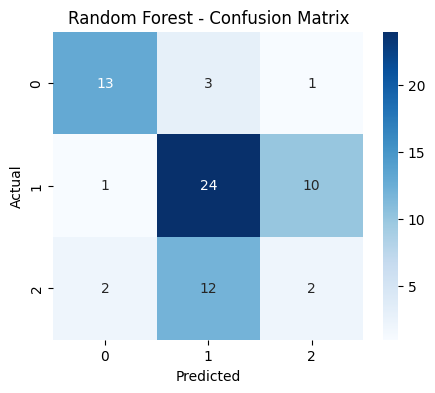

In [10]:
# Part E: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n---- {model_name} ----")

    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(acc, 3))

    # Classification Report (precision, recall, F1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(knn, X_test_scaled, y_test, "KNN")
evaluate_model(rf, X_test, y_test, "Random Forest")